## Table of contents
1. [Introduction](#introduction)
2. [Business Problem](#problem)
3. [Data](#data)
4. [Methodology](#methodology)<br>
    4.1 [Data Cleaning](#clean)<br>
    4.2 [Exploratory Data Analysis](#explore)<br>
    4.3 [Predictive Modelling](#model)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>
This is a Machile Learning group 1 assignment. 
Group members are:

1.   Waiyuyu Rachael Anne
2.   Andrew Wamarema
3.   Brian Njau
4.   Nicole Mwikali
5.   Bonfix Ngetich


### 2. Business Problem <a name="problem"/>

The objective of this project is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements 

## 3. Data <a name="data"></a>

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## 4. Methodology <a name="methodology"></a>

### 4.1 Data Understanding and Cleaning  <a name="cleaning"></a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#then import data
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


#### Data Summary

In [ ]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Drop the duplicates
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#create a function
def replaceZeroWithMean(columnNames):
    for columnName in columnNames:
        df[columnName] = df[columnName].replace(0, df[columnName].mean())

        

In [ ]:
#use the function to replace zero values
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
replaceZeroWithMean(columns_to_replace)
df.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

### 4.2	Exploratory Data Analysis 

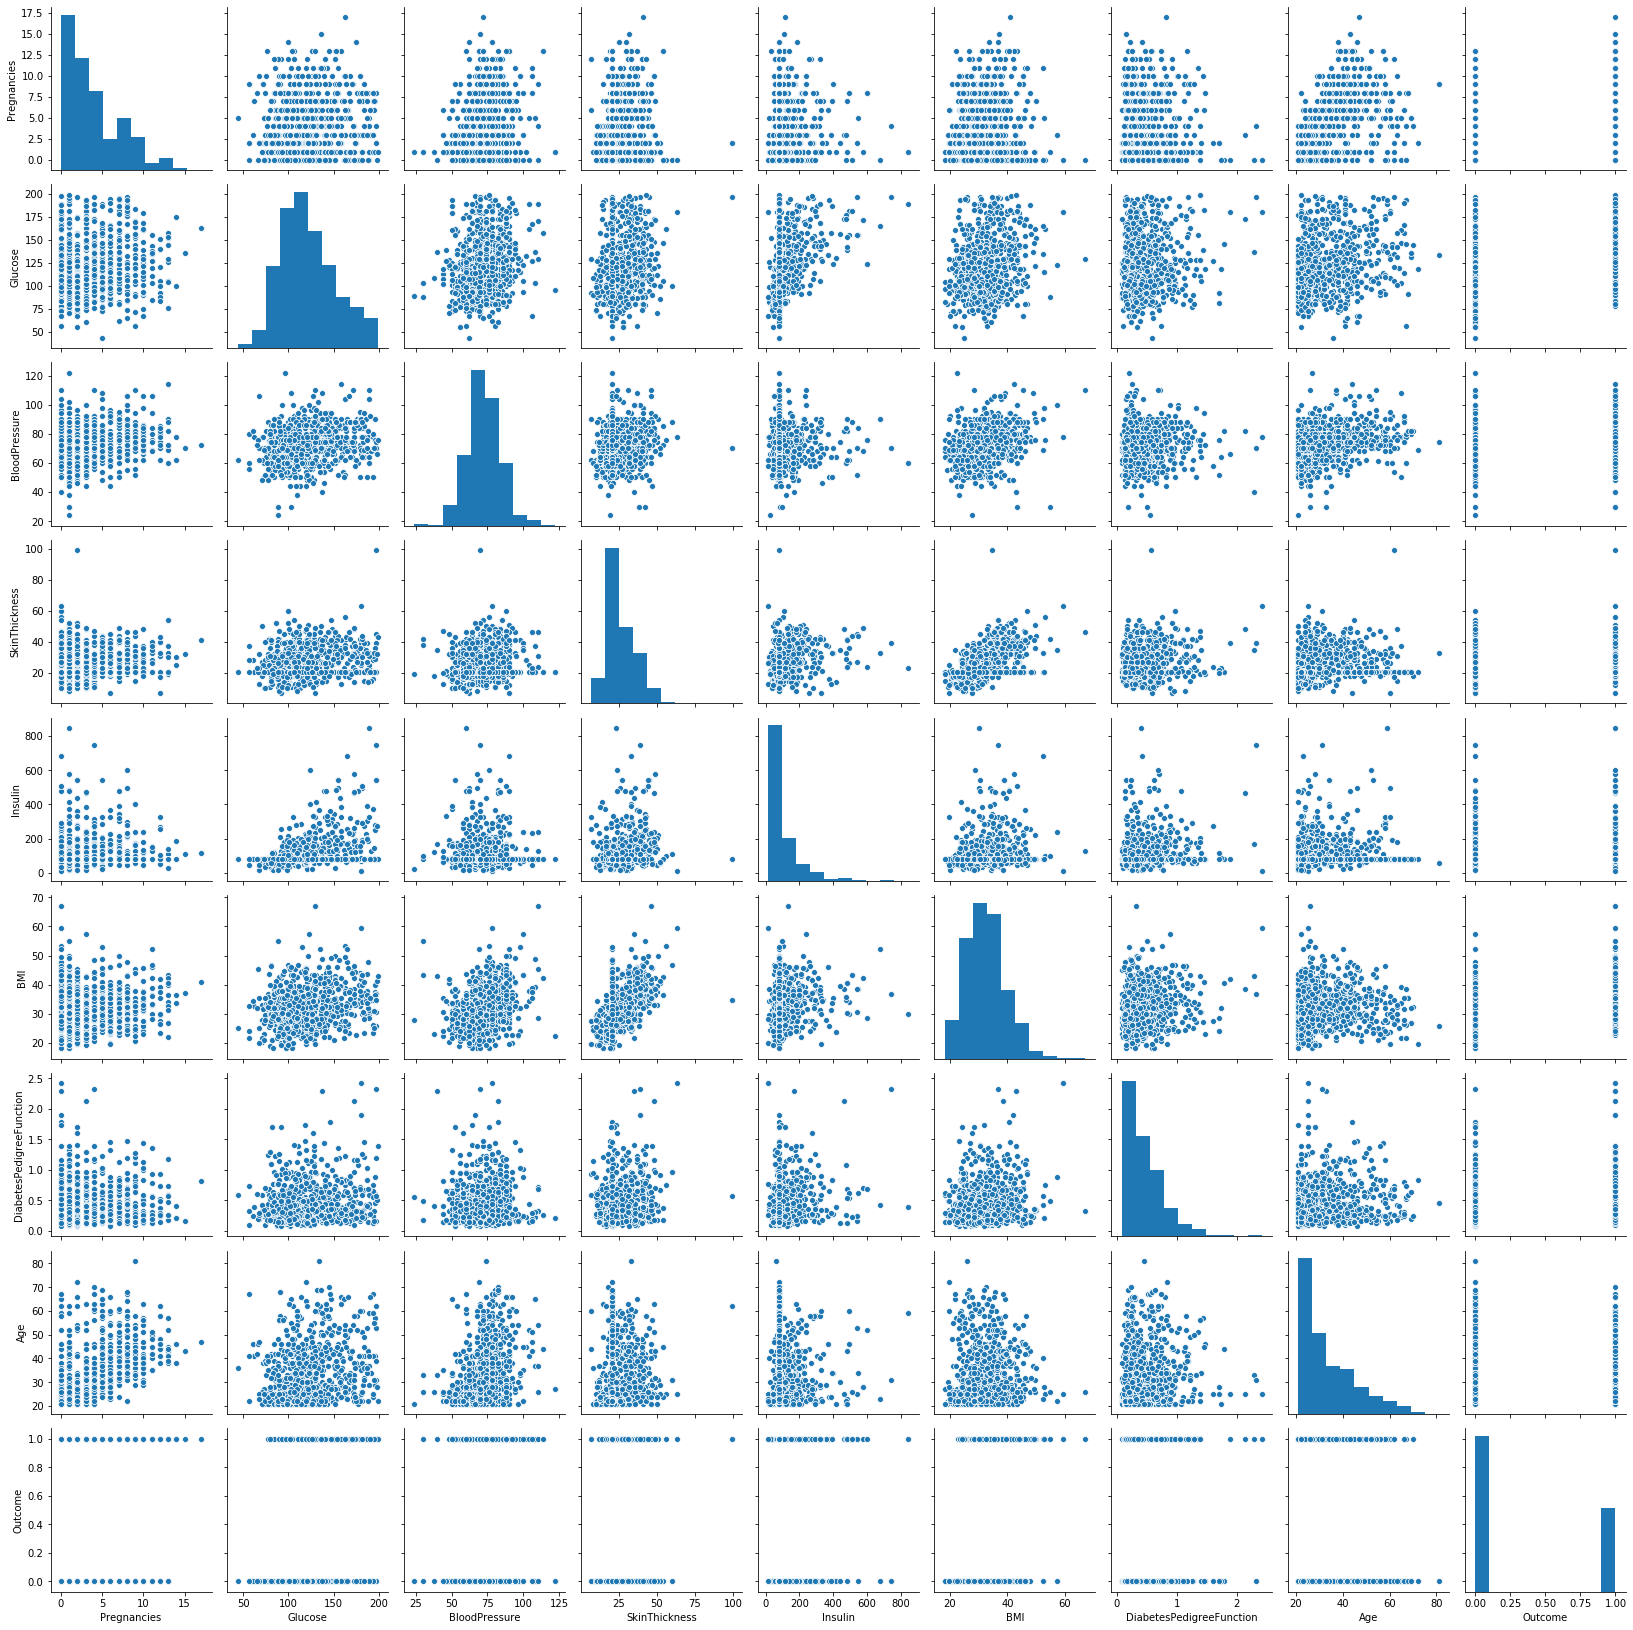

In [ ]:
#outcome - yaxis vs age - x-axis
sns.pairplot(df)


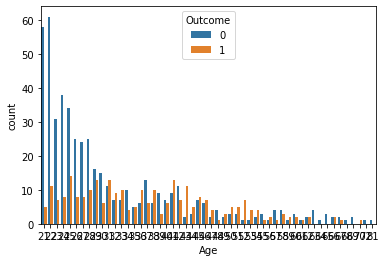

In [ ]:
#count plot???
sns.countplot('Age', hue='Outcome', data=df)

In [ ]:
#relations between
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


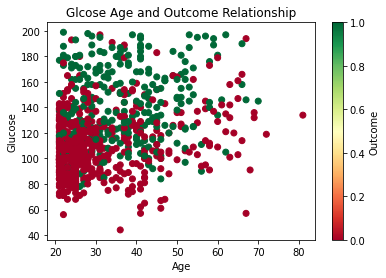

In [ ]:
#scatterplot outcome vs Age
plt.scatter(df['Age'], df['Glucose'], c=df['Outcome'], cmap='RdYlGn')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glcose Age and Outcome Relationship')
cbar = plt.colorbar()
cbar.set_label('Outcome')

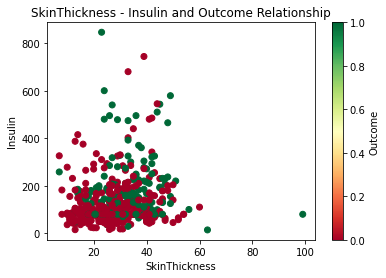

In [ ]:
#scatterplot skinthickness and Insulin
plt.scatter(df['SkinThickness'], df['Insulin'], c=df['Outcome'], cmap='RdYlGn')
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('SkinThickness - Insulin and Outcome Relationship')
cbar = plt.colorbar()
cbar.set_label('Outcome')

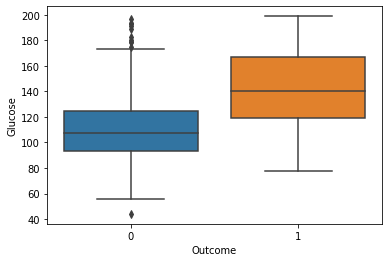

In [ ]:
#Boxplot Glucose level vs Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)

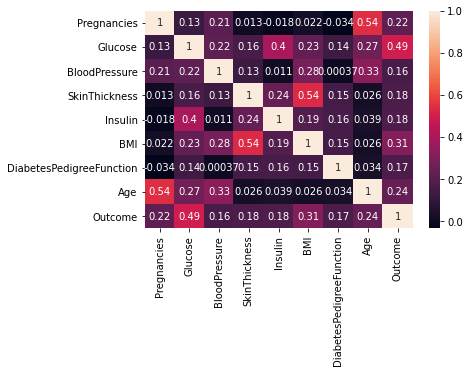

In [ ]:
#Heatmap 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

Text(0.5, 1.0, 'Patients outcomes with glucose levels')

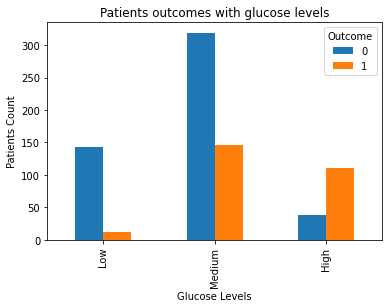

In [ ]:
#Group
bins = np.linspace(min(df["Glucose"]), max(df["Glucose"]), 4)

df['Glucose-binned'] = pd.cut(df['Glucose'], bins, labels=['Low', 'Medium', 'High'], include_lowest=True )
df[['Glucose','Glucose-binned']].head(20)

#group
df2 = df.groupby(["Glucose-binned", "Outcome"]).size().reset_index(name='Count')
df3 = pd.pivot_table(df2,  values='Count',  columns=['Outcome'],  index = "Glucose-binned",
                         aggfunc=np.sum,  fill_value=0)
df3.plot(kind="bar")
plt.xlabel("Glucose Levels")
plt.ylabel("Patients Count")
plt.title("Patients outcomes with glucose levels")

## Predictive Modelling <a name='model'>

1. Linear Regression
2. Ridge
3. Lasso
4. Elastic Net

Steps:
1. Ensure that the data is clean and numerical
2. Separate data into features and targets
3. Split data into training test
4. Train our models
5. Evaluate models to ensure they are okay
6. Hyper-parameter tune the best model

**Separate data into features and targets**

Dependent variable: outcome

Indpendent variables to be used: ALL the variables

**Split data into training test**

In [ ]:
#import module for splitting
from sklearn.model_selection import train_test_split
#	Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
xcols = ['Insulin', 'Glucose', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[xcols]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.head()

,Insulin,Glucose,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
596,79.799479,67.0,0,76.0,20.536458,45.3,0.194,46
90,79.799479,80.0,1,55.0,20.536458,19.1,0.258,21
734,79.799479,105.0,2,75.0,20.536458,23.3,0.560,53
694,79.799479,90.0,2,60.0,20.536458,23.5,0.191,25
517,79.799479,125.0,7,86.0,20.536458,37.6,0.304,51


**Train our models**

**Linear Regression**

In [ ]:
#import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#create model
linear_model = LinearRegression()
#train the model
linear_model.fit(X_train, y_train)
#predictions
linear_model_predictions =linear_model.predict(X_test)


**Ridge**

In [ ]:
#create model
ridge_model = Ridge(alpha=1)
#train
ridge_model.fit(X_train, y_train)
#predictions
ridge_model_predictions = ridge_model.predict(X_test)

Lasso

In [ ]:
lasso_model = Lasso(alpha=1)
#train
lasso_model.fit(X_train, y_train)
#predi
lasso_model_predictions = lasso_model.predict(X_test)

Elastic Net

In [ ]:
elastinet_model = ElasticNet(alpha=1)
#train
elastinet_model.fit(X_train, y_train)
#pred
elastinet_model_predictions = elastinet_model.predict(X_test)

#### Evaluation of Models

**Linear regression**

In [ ]:
#mean squared error, 
from sklearn.metrics  import mean_absolute_error, mean_squared_error



In [ ]:
#create a function to evaluate
def evaluate_model(Y, Y_pred, model_name):
  #mae
  mae = mean_absolute_error(Y, Y_pred)
  mse = mean_squared_error(Y, Y_pred, squared=False)
  print(model_name + ':: Mean Absolute Error: '+str(mae)+' Mean Squared Error: '+str(mse))

In [ ]:
#Do the actual evaluations using our func
evaluate_model(y_test, linear_model_predictions, 'Linear Model')
evaluate_model(y_test, ridge_model_predictions, 'Ridge Model')
evaluate_model(y_test, lasso_model_predictions, 'Lasso Model')
evaluate_model(y_test, elastinet_model_predictions, 'Elastic Net Model')

Linear Model:: Mean Absolute Error: 0.305412112879279 Mean Squared Error: 0.38145069537891885
Ridge Model:: Mean Absolute Error: 0.30534506973135056 Mean Squared Error: 0.3813084882652311
Lasso Model:: Mean Absolute Error: 0.3349116642174446 Mean Squared Error: 0.38661176503092454
Elastic Net Model:: Mean Absolute Error: 0.31892549428598155 Mean Squared Error: 0.37811930604181315


Check Accuracy of Training

In [ ]:
linear_model.score(X_train, y_train)

0.31210875801639304

## Results and Discussion <a name='results'>

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. 

Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and others. We saw on data.head() that some features contain 0, it doesn't make sense from a medical perspective and therefore, this indicates missing values, we replaced the missing values with their corresponding medians. 

The correlation matrix shows the correlations between sets of variables. Based on the output of the table, we are able to confirm that indeed the dependant variables affect the outcome. 

Based on the low values of the Mean Absolute Error and the Mean Squared Error we are able to conclude that the quality of our model is relative high, therefore our predicitions are accurate.


## Conclusion <a name='conclusion'>

From our research, we are able to confirm that indeed the all the independent variables investigated in the dataset affect the chance of someone getting diabetes.

And based on the low values of the Mean Absolute Error and the Mean Squared Error we are able to conclude that the quality of our model is relative high, therefore our predicitions are accurate.